In [6]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as kr

In [68]:
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :, :, :]
    shuffled_Y = Y[permutation, :]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    # number of mini batches of size mini_batch_size in your partitionning
    num_complete_minibatches = math.floor(m / mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size: k *
                                  mini_batch_size + mini_batch_size, :, :, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size: k *
                                  mini_batch_size + mini_batch_size, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches *
                                  mini_batch_size: m, :, :, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches *
                                  mini_batch_size: m, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


In [69]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [67]:
from tensorflow.keras.datasets import mnist

In [58]:
(train_X,train_Y),(test_X,test_Y)=mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [66]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(60000, 28, 28, 1)
(1, 60000)
(10000, 28, 28, 1)
(1, 10000)


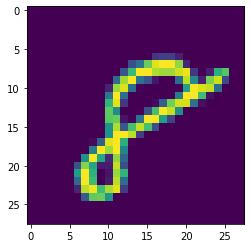

In [62]:
plt.imshow(train_X[59999])
plt.show()

In [65]:
train_X=train_X.reshape(60000,28,28,1)
train_Y=train_Y.reshape(1,60000)
test_X=test_X.reshape(10000,28,28,1)
test_Y=test_Y.reshape(1,10000)

In [70]:
train_X=train_X/255
test_X=test_X/255
test_Y=convert_to_one_hot(test_Y,10)


IndexError: arrays used as indices must be of integer (or boolean) type

In [71]:
train_Y=convert_to_one_hot(train_Y,10)

In [74]:
train_Y=train_Y.T
test_Y=test_Y.T
train_Y.shape

(60000, 10)